# Exercise 2

This notebook shows how we can perform linear regression on a dataset.

We generate a noisy dataset:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

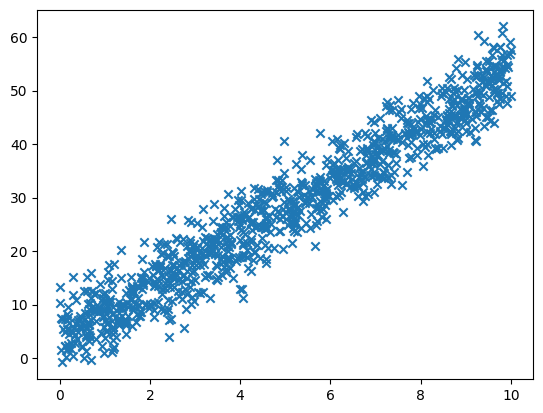

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Implement the gradient as in the previous notebook, but this time use the [torch.nn.MSELoss](https://pytorch.org/docs/stable/nn.html#mseloss) class for the loss calculation. Also, use a pytorch optimizer such as [torch.optim.SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) instead of updating the weights manually. Using an optimizer is done in the following way:

```python
optimizer = optim.SGD([weights], lr=my_learning_rate)
   
# in the optimization loop:
optim.zero_grad() # equivalent to weights.grad.zero_()
# loss calculation here, then
optim.step() # equivalent to weights -= learning_rate*weights.grad
```

 In models with many weight tensors, using an optimizer is way easier than updating them all individually. Also, using different optimizers is as easy as using a different `torch.optim` class.

## Solution

In [5]:
X_ = np.c_[X, np.ones((X.shape[0]))]

In [6]:
import torch
import torch.optim as optim
import torch.nn as nn

num_samples = X_.shape[0]
num_features = X_.shape[1]
X_t = torch.as_tensor(X_)
y_t = torch.as_tensor(y)
print(X_t.shape)
print(y_t.shape)

torch.Size([1000, 2])
torch.Size([1000, 1])


In [8]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)


weights = generate_weights(num_features)
print(weights.shape)
weights = torch.tensor(weights, requires_grad=True)

def predict(X, weights):
    return torch.matmul(X, weights)

predictions = predict(X_t,weights)
print("Shape of Predictions:",predictions.shape)

compute_loss = torch.nn.MSELoss()


print("Loss :",compute_loss(predictions,y_t))



(2, 1)
Shape of Predictions: torch.Size([1000, 1])
Loss : tensor(1030.5997, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [9]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=100):

    X_ = np.c_[X, np.ones((X.shape[0]))]
    num_samples = X_.shape[0]
    num_features = X_.shape[1]
    X = torch.as_tensor(X_)
    y = torch.as_tensor(y)

    weights = generate_weights(num_features)
    weights = torch.tensor(weights, requires_grad=True)

    optimizer = optim.SGD([weights], lr=0.01)

    # Training loop
    for i in range(n_iterations):
        # Forward pass: Compute predictions and loss
        y_pred = predict(X, weights)
        Loss = compute_loss(y_pred, y)

        # Zero the gradients before backpropagation
        optimizer.zero_grad()

        # Backward pass: Compute gradients
        Loss.backward()

        # Update weights using the optimizer
        optimizer.step()

        print(f"Iteration {i}: Loss = {Loss} Weights : {weights.detach().numpy().flatten()},Gradient : {weights.grad.detach().numpy().flatten()}")

    return weights, Loss

In [10]:
weights100, Loss100 = gradient_descent(X, y, learning_rate=0.01, n_iterations=100)
print("Weights for 100 iterations:",weights100.detach().numpy().flatten())
print("loss for 100 iterations:",Loss100.detach().numpy().flatten())

Iteration 0: Loss = 1030.599656789253 Weights : [3.48296971 1.20050121],Gradient : [-366.03967789  -56.30949238]
Iteration 1: Loss = 122.46970633279408 Weights : [4.66882967 1.38928032],Gradient : [-118.58599605  -18.87791079]
Iteration 2: Loss = 26.996567728195828 Weights : [5.052383   1.45666514],Gradient : [-38.35533217  -6.73848275]
Iteration 3: Loss = 16.95248082085351 Weights : [5.17581162 1.4846598 ],Gradient : [-12.342862    -2.79946606]
Iteration 4: Loss = 15.889034003897255 Weights : [5.21490546 1.49985239],Gradient : [-3.90938487 -1.51925853]
Iteration 5: Loss = 15.769735200922725 Weights : [5.22666034 1.51086363],Gradient : [-1.17548734 -1.10112373]
Iteration 6: Loss = 15.74976298196596 Weights : [5.22955578 1.52048874],Gradient : [-0.28954437 -0.96251136]
Iteration 7: Loss = 15.740306382806178 Weights : [5.22958334 1.52963417],Gradient : [-0.00275562 -0.91454287]
Iteration 8: Loss = 15.732028583723858 Weights : [5.2286856  1.53859396],Gradient : [ 0.08977352 -0.8959787 ]
I

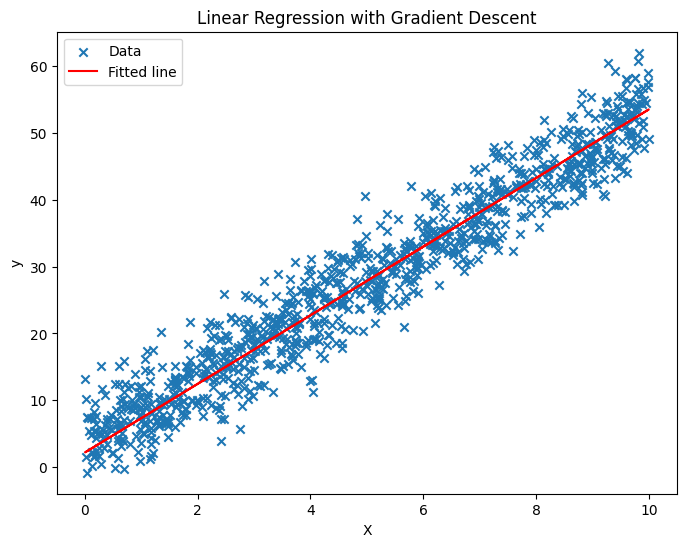

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, marker='x', label='Data')
plt.plot(X, predict(X_t, weights100).detach().numpy(), color='red', label='Fitted line')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()